# **Import Dataset**

The dataset contains information if a patient has been deceased or not, based on some features/symptoms observed in them. The features are as follows,

- **Age** : $\in \mathbb{R}$
- **Anaemia** : $\in \{0,1\}$, Decrease of red blood cells or hemoglobin
- **Creatinine Phosphokinase** : $\in \mathbb{Z}$, Level of the CPK enzyme in the blood (mcg/L)
- **Diabetes** : $\in \{0, 1\}$, If the patient has diabetes
- **Ejection Fraction** : $\in [0, 100]$, Percentage of blood leaving the heart at each contraction
- **High Blood Pressure** : $\in \{0, 1\}$, If the patient has hypertension
- **Platelets** : $\in \mathbb{Z}$, Platelets in the blood (kiloplatelets/mL)
- **Serum Creatinine** : $\in \mathbb{R}$, Level of serum creatinine in the blood (mg/dL)
- **Serum Sodium** : $\in \mathbb{Z}$, Level of serum sodium in the blood (mEq/L)
- **Sex** : $\in \{0,1\}$, Woman or man
- **Smoking** : $\in \{0,1\}$, If the patient smokes or not
- **Time** : $\in \mathbb{Z}$, Follow-up period (in days)

Based on the feature values, it is given if the patient deceased during the follow-up period or not. This is given in column **DEATH_EVENT**, which takes values $\in \{0,1\}$. The dataset is [available on Kaggle](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

heart = pd.read_csv('heart_failure.csv')
heart.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# **Visualization of 2 features**

You can visualize by taking any two features and plotting them along with the axes. As the target takes binary values, I have used 2 different colours to represent the values, Red for Deceased (1) and Blue for Not Deceased (0). Here I have taken **Age** and **Number of Platelets** along with Horizontal and Vertical axes respectively.

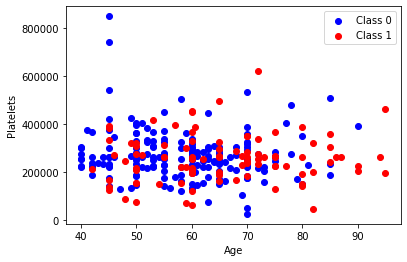

In [2]:
X_age_0 = [heart['age'][i] for i in range(len(heart)) if heart['DEATH_EVENT'][i]==0]
X_age_1 = [heart['age'][i] for i in range(len(heart)) if heart['DEATH_EVENT'][i]==1]

y_diabetes_0 = [heart['platelets'][i] for i in range(len(heart)) if heart['DEATH_EVENT'][i]==0]
y_diabetes_1 = [heart['platelets'][i] for i in range(len(heart)) if heart['DEATH_EVENT'][i]==1]

plt.scatter(X_age_0, y_diabetes_0, color='blue')
plt.scatter(X_age_1, y_diabetes_1, color='red')
plt.xlabel('Age')
plt.ylabel('Platelets')
plt.legend(['Class 0', 'Class 1'])
plt.show()

# Splitting Dataset and applying Random Forest Classifier

In this step, the dataset is split into Train set and Validation set. $70%$ of the instances have been used for Training and rest $30%$ have been used in Validation of the model. You can further split the Validation Set into Test Set and Validation Set.

After that, ```RandomForestClassifier```, an ensemble of Decision Trees is applied on the dataset. I have used ```Scikits-learn```'s inbuilt ```RandomForestClassifier``` here. For simplicity, Default parameters have been kept. Deault parameter values can be obtained by the ```get_params()``` method of ```RandomForestClassifier``` class.

In [3]:
X = np.array([heart.loc[i][:-1] for i in range(len(heart))])
y = np.array(heart['DEATH_EVENT'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(f"Train Score : {clf.score(X_train, y_train)} \t Validation Score : {clf.score(X_test, y_test)}")
print(clf.get_params())

Train Score : 1.0 	 Validation Score : 0.8666666666666667
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# Probability of Predicted Classes

We can get the probabilities of predictions for each class. At a high level, we get the classification as the class having highest predicted probability. For example, in the first instance below, the model has predicted Class $0$ to be $0.92$ and Class $1$ to be $0.08$, therefore the Class prediction is $0$. I have used the inbuilt ```predict_proba()``` function to get the class prediction probabilities.

In [4]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
print(f"Predictions : {y_pred[:10]}\nPred Prob : {y_pred_prob[:10]}")

Predictions : [1 0 0 0 0 0 0 0 0 0]
Pred Prob : [[0.22 0.78]
 [0.85 0.15]
 [0.94 0.06]
 [0.98 0.02]
 [0.64 0.36]
 [1.   0.  ]
 [0.99 0.01]
 [0.86 0.14]
 [0.8  0.2 ]
 [0.82 0.18]]


# Computing ROC Curve and AUC Score

**ROC** stands **Receiver Operator Characteristics** for and **AUC** means **Area Under the Curve**. Higher value of AUC means our binary classifier can efficiently distinguish between Class $0$ and Class $1$. You can check out some good explanations [here](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/), [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5).

Using ```Scikits-learn```'s inbuilt methods, you can obtain these easily.

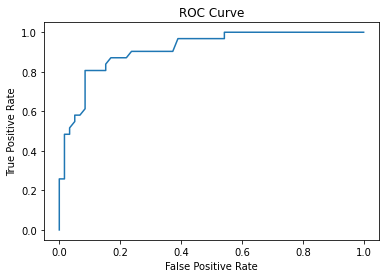

AUC Score : 0.9136139967195188


In [5]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr0, tpr0, _ = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr0, tpr0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(f"AUC Score : {roc_auc_score(y_test, y_pred_prob[:,1])}")

# Finding correlation between Diabetes and Death Event

This is an additional task you can do to find a correlation between any of the feature and the Death Event due to Heart failure. I have chosen the attribute Diabetes i.e. trying to find if Diabetes has a major impact on death due to heart disease or not.

From the dataset, the analysis shows that number of Patients with diabetes survived is more than the number of patients deceased without diabetes.

In [6]:
diabetes_death = 0
diabetes_notdeath = 0
notdiabetes_death = 0

for i in range(len(heart)):
    if heart['diabetes'][i]==1 and y[i]==1:
        diabetes_death += 1
    elif heart['diabetes'][i]==1 and y[i]==0:
        diabetes_notdeath += 1
    elif heart['diabetes'][i]==0 and y[i]==1:
        notdiabetes_death += 1

print(f"Patients deceased having diabetes : {diabetes_death}\nPatients deceased not having Diabetes : {notdiabetes_death}\nPatients survived with diabetes : {diabetes_notdeath}")

Patients deceased having diabetes : 40
Patients deceased not having Diabetes : 56
Patients survived with diabetes : 85


This code has been submitted by [```ayan-cs```](https://github.com/ayan-cs). Don't forget to Follow me on Github.